# 5. Convergence Mode Separation

**Goal:** Construct explicit sequences separating different modes of convergence.

## Background

| Mode | Definition |
|------|------------|
| **Pointwise** | $f_n(x) \to f(x)$ for every $x$ |
| **A.E.** | $f_n(x) \to f(x)$ for a.e. $x$ |
| **In measure** | $\mu(\{|f_n - f| > \varepsilon\}) \to 0$ |
| **In $L^p$** | $\|f_n - f\|_p \to 0$ |
| **Uniform** | $\sup_x |f_n(x) - f(x)| \to 0$ |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Typewriter Sequence (In Measure, Not A.E.)

The bump slides across $[0,1]$ in cycles of shrinking width.
Support measure $\to 0$ (convergence in measure), but every point is revisited infinitely often (no a.e. convergence).

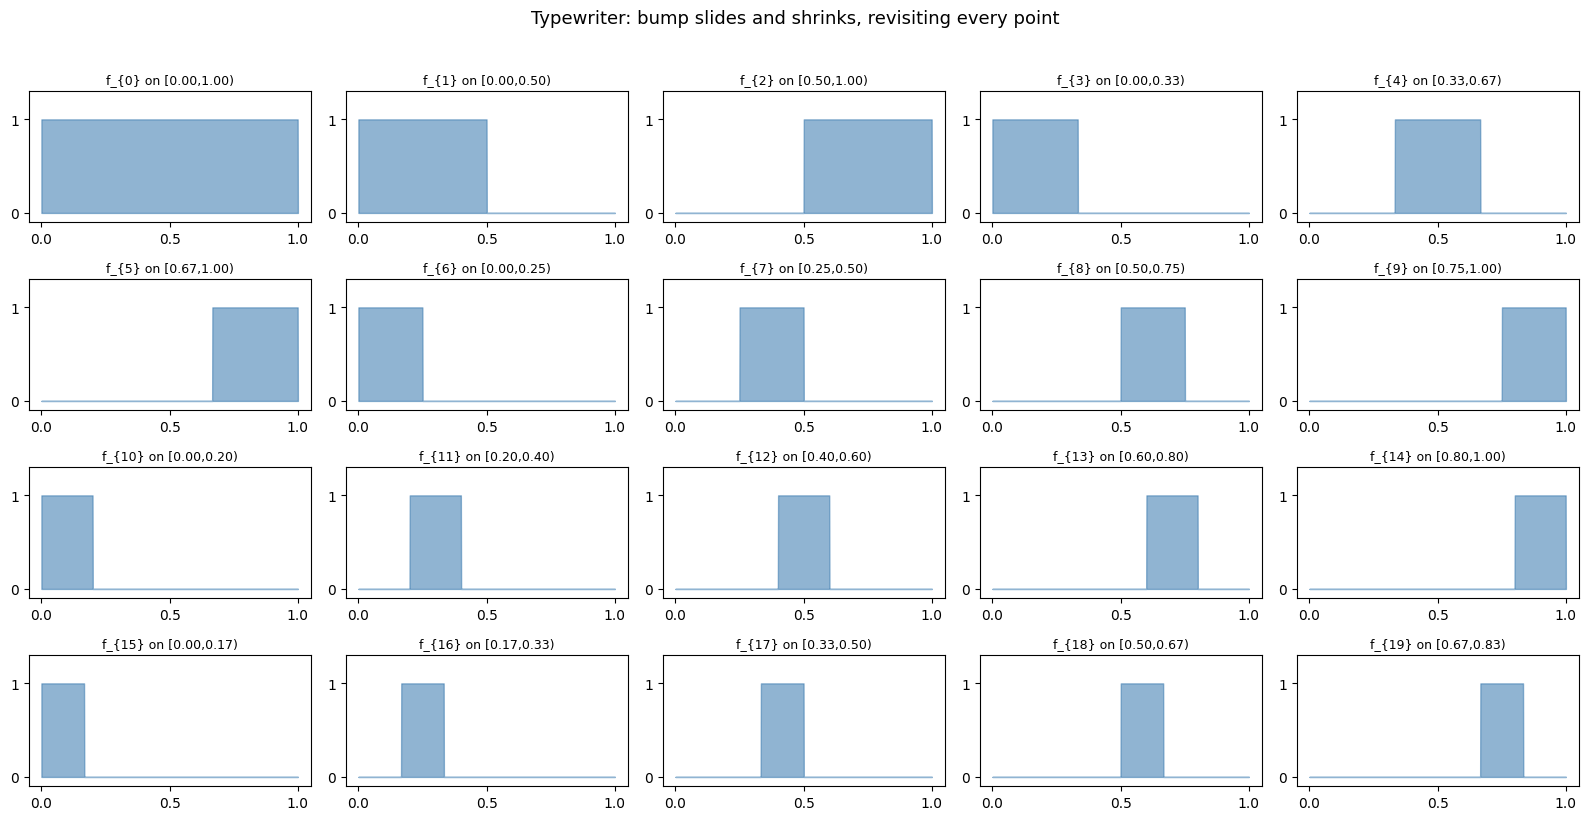

In [2]:
def typewriter_interval(n):
    k, total = 0, 0
    while total + k + 1 <= n:
        total += k + 1
        k += 1
    j = n - total
    width = 1.0 / (k + 1)
    return j * width, (j + 1) * width

x = np.linspace(0, 1, 1000)
fig, axes = plt.subplots(4, 5, figsize=(16, 8))
for idx, ax in enumerate(axes.flat):
    a, b = typewriter_interval(idx)
    y = ((x >= a) & (x < b)).astype(float)
    ax.fill_between(x, y, alpha=0.6, color='steelblue')
    ax.set_ylim(-0.1, 1.3)
    ax.set_title(f'f_{{{idx}}} on [{a:.2f},{b:.2f})', fontsize=9)
    ax.set_xticks([0, 0.5, 1]); ax.set_yticks([0, 1])
plt.suptitle('Typewriter: bump slides and shrinks, revisiting every point', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

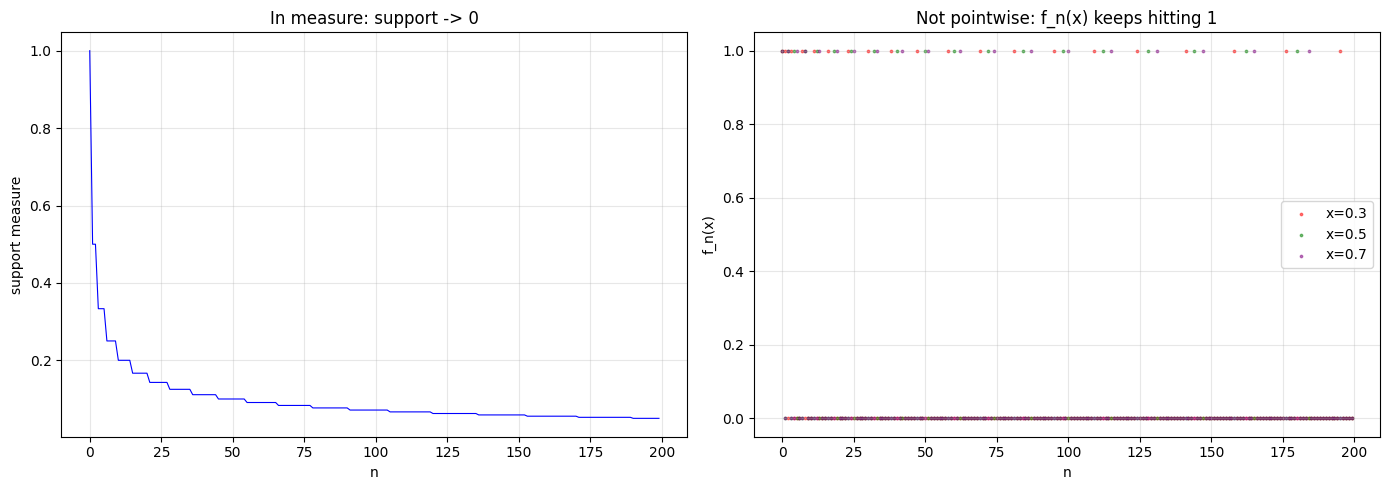

In [3]:
N = 200
measures = []
track_points = [0.3, 0.5, 0.7]
point_values = {p: [] for p in track_points}

for n in range(N):
    a, b = typewriter_interval(n)
    measures.append(b - a)
    for p in track_points:
        point_values[p].append(1.0 if a <= p < b else 0.0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(range(N), measures, 'b-', linewidth=0.8)
ax1.set_xlabel('n'); ax1.set_ylabel('support measure')
ax1.set_title('In measure: support -> 0', fontsize=12)
ax1.grid(True, alpha=0.3)

for p, c in zip(track_points, ['red','green','purple']):
    ax2.scatter(range(N), point_values[p], s=3, alpha=0.5, c=c, label=f'x={p}')
ax2.set_xlabel('n'); ax2.set_ylabel('f_n(x)')
ax2.set_title('Not pointwise: f_n(x) keeps hitting 1', fontsize=12)
ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Example 2: A.E. Convergence but Not in $L^p$

$f_n(x) = n \cdot \mathbf{1}_{(0, 1/n]}$: converges to 0 a.e., but $\|f_n\|_1 = 1$ always.

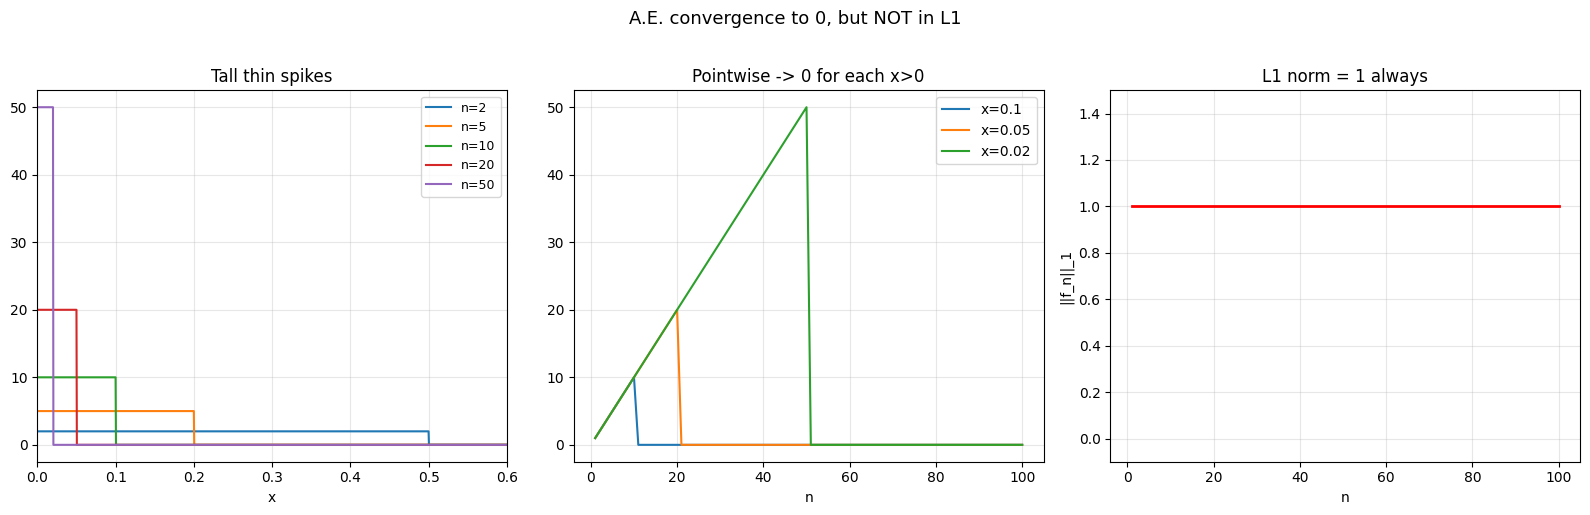

In [4]:
x = np.linspace(0.001, 1, 2000)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

ax = axes[0]
for n in [2, 5, 10, 20, 50]:
    ax.plot(x, n*(x <= 1/n).astype(float), label=f'n={n}')
ax.set_xlabel('x'); ax.set_title('Tall thin spikes', fontsize=12)
ax.legend(fontsize=9); ax.set_xlim(0, 0.6); ax.grid(True, alpha=0.3)

ax = axes[1]
ns = np.arange(1, 101)
for x0 in [0.1, 0.05, 0.02]:
    ax.plot(ns, [n*(x0<=1/n) for n in ns], label=f'x={x0}')
ax.set_xlabel('n'); ax.set_title('Pointwise -> 0 for each x>0', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)

ax = axes[2]
ax.plot(ns, [1.0]*len(ns), 'r-', linewidth=2)
ax.set_xlabel('n'); ax.set_ylabel('||f_n||_1')
ax.set_title('L1 norm = 1 always', fontsize=12)
ax.set_ylim(-0.1, 1.5); ax.grid(True, alpha=0.3)

plt.suptitle('A.E. convergence to 0, but NOT in L1', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

## Summary: Implication Map

```
Uniform => A.E. => In Measure
  ||        ||        ^^ (subsequence)
 L^inf => L^p  => In Measure
```

**Non-implications:** In measure =/=> A.E. (typewriter); A.E. =/=> L^p (tall spikes).

**Rescue:** Convergence in measure => a subsequence converges a.e.